**Machine maintenance prediction**

**Problem Statement**

Develop a predictive maintenance model to forecast potential failures in industrial equipment based on various operational and environmental parameters.

Importing all the necessary libraries

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Importing the dataset

In [ ]:
df = pd.read_csv('/content/predictive_maintenance.csv')


***Exploratory data analysis [EDA] and Data Cleaning***

In [ ]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [ ]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
df.tail()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,No Failure


In [ ]:
df.shape

(10000, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [ ]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

From above we can conclude that there are no null values in the *dataset*

**Descriptive Statistics**:
Calculating summary statistics for each numerical column, such as mean, median, standard
deviation, and quartiles.

In [ ]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


[Text(0, 0, '9652'),
 Text(0, 0, '95'),
 Text(0, 0, '45'),
 Text(0, 0, '78'),
 Text(0, 0, '18'),
 Text(0, 0, '112')]

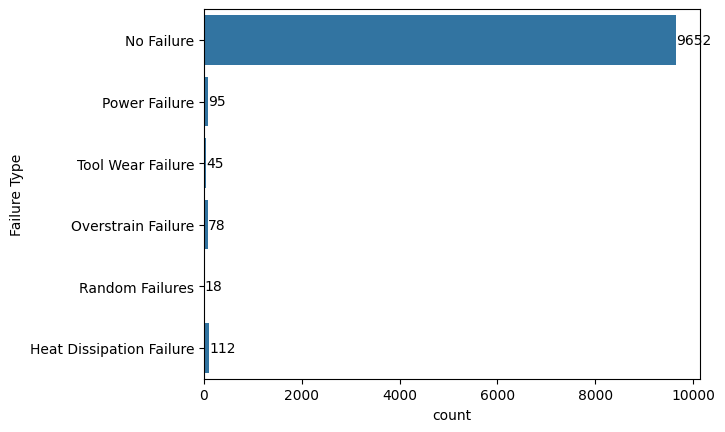

In [ ]:
a=sns.countplot(df['Failure Type'])
a.bar_label(a.containers[0])

From above plot we can derive that there are 6 types of failures. Among all the Failure types, No failure has repeated frequently.


[Text(0, 0, '9661'), Text(0, 0, '339')]

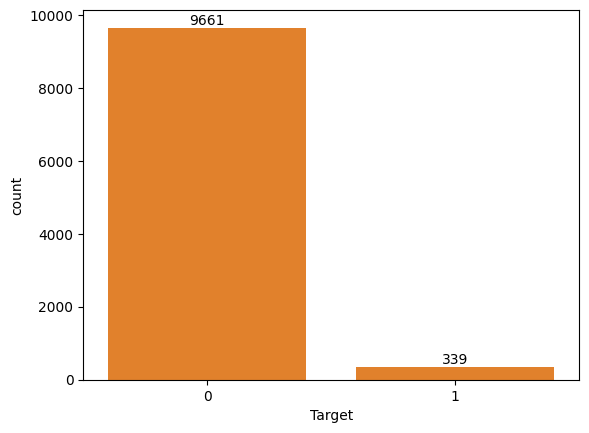

In [ ]:
sns.countplot(x='Target',data = df).bar_label(sns.countplot(x='Target',data = df).containers[0])

From above plot we can say that the given data is unbalanced, as the number of zeros are more than number of ones in target column.

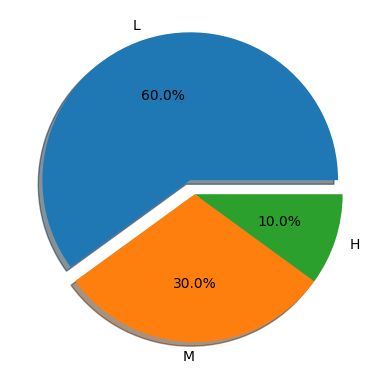

In [ ]:
plt.pie(df['Type'].value_counts(),labels=df['Type'].value_counts().index, autopct='%1.1f%%',explode= [0.1,0,0],shadow=True)
plt.show()

From above we can say that there are three categories of the product in Type column namely 'L', 'M', 'H'

In [ ]:
a=pd.value_counts(df['Type'])
a


Type
L    6000
M    2997
H    1003
Name: count, dtype: int64

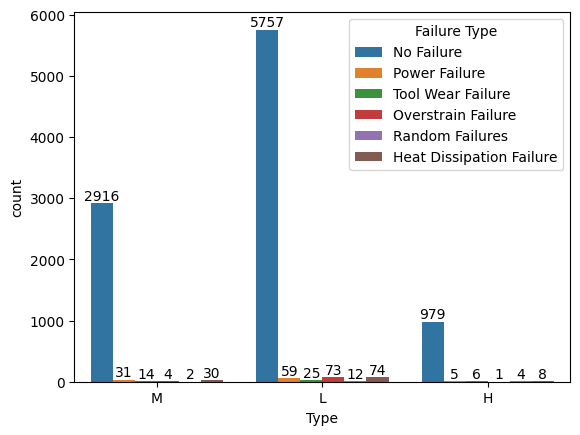

In [ ]:
a = sns.countplot(x='Type', data=df, hue=df['Failure Type'])
for container in a.containers:
    a.bar_label(container)

From the above count plot, we obtain the count of types of failures in each motor type (L,M,H)

From above, we can conclude that there are two features, Failure type and Target having too many no failures types in failure column and number of zeros in target column, this may affect the accuracy so let us drop some of them.

As the columns UDI and Product ID have unique codes for all 10,000 rows and they do not affect the target column, we can drop the UDI and Product ID columns.



In [ ]:
data = df[df['Target'] == 0]
rows = data.sample(n=5000, random_state=42)
data = df.drop(rows.index)
print(df.shape)
print(data.shape)
data = data.drop(columns=["UDI","Product ID"])
data

(10000, 10)
(5000, 10)


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure
5,M,298.1,308.6,1425,41.9,11,0,No Failure
6,L,298.1,308.6,1558,42.4,14,0,No Failure
...,...,...,...,...,...,...,...,...
9990,L,298.8,308.5,1527,36.2,3,0,No Failure
9991,M,298.9,308.4,1827,26.1,5,0,No Failure
9992,L,298.8,308.4,1484,39.2,8,0,No Failure
9994,L,298.8,308.3,1634,27.9,12,0,No Failure


In [ ]:
data["Target"].value_counts()

Target
0    4661
1     339
Name: count, dtype: int64

In Target column, zero indicates there is no failure occurred so let us remove those rows which contains 0 in target column but indicating that there is a failure in failure type column.

one indicates that there is a failure so let us remove those rows which contains 1 in target column but there is no failure in failure type column.


In [ ]:
data = data.drop(data[(data['Target'] == 0) & (data['Failure Type'] != 'No Failure')].index)
data = data.drop(data[(data['Target'] == 1) & (data['Failure Type'] == 'No Failure')].index)
print(data["Target"].value_counts() )

Target
0    4650
1     330
Name: count, dtype: int64


<Axes: >

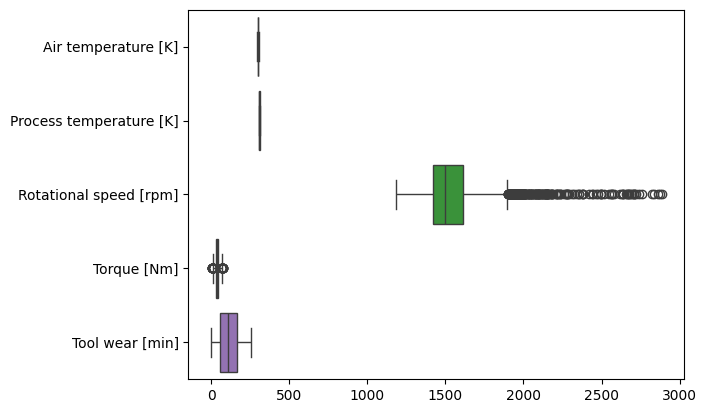

In [ ]:
sns.boxplot(data=[data['Air temperature [K]'], data['Process temperature [K]'], data['Rotational speed [rpm]'], data['Torque [Nm]'], data['Tool wear [min]']], orient='h')

There are outliers in Rotational speed [Rpm] and Torque [Nm] features. so we will use standard scaler while training the model.

<Axes: >

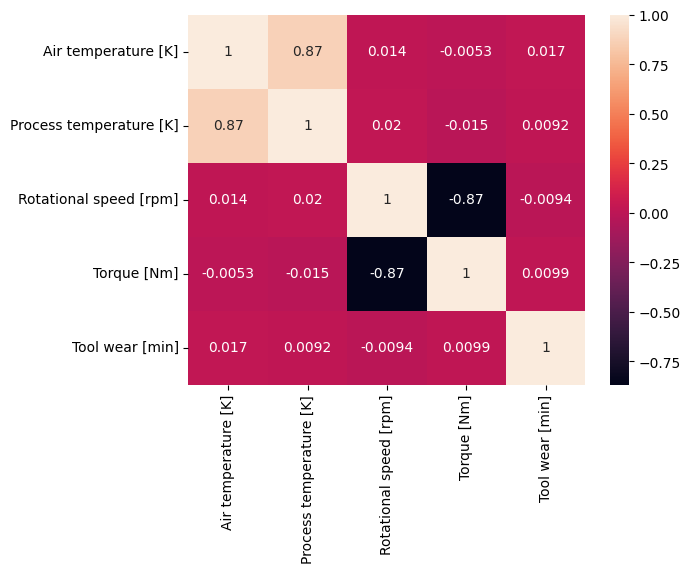

In [ ]:
h = data[["Air temperature [K]","Process temperature [K]","Rotational speed [rpm]","Torque [Nm]","Tool wear [min]"]].corr()
sns.heatmap(h, annot=True)



*   The positive value indicates the two features are directly proportional to each other
*   The negative value indicates the two features are indirectly proportional to each other

EX.
*   air temperature increases as process temperature increase

*   as torque increases rotational speed decreases


    




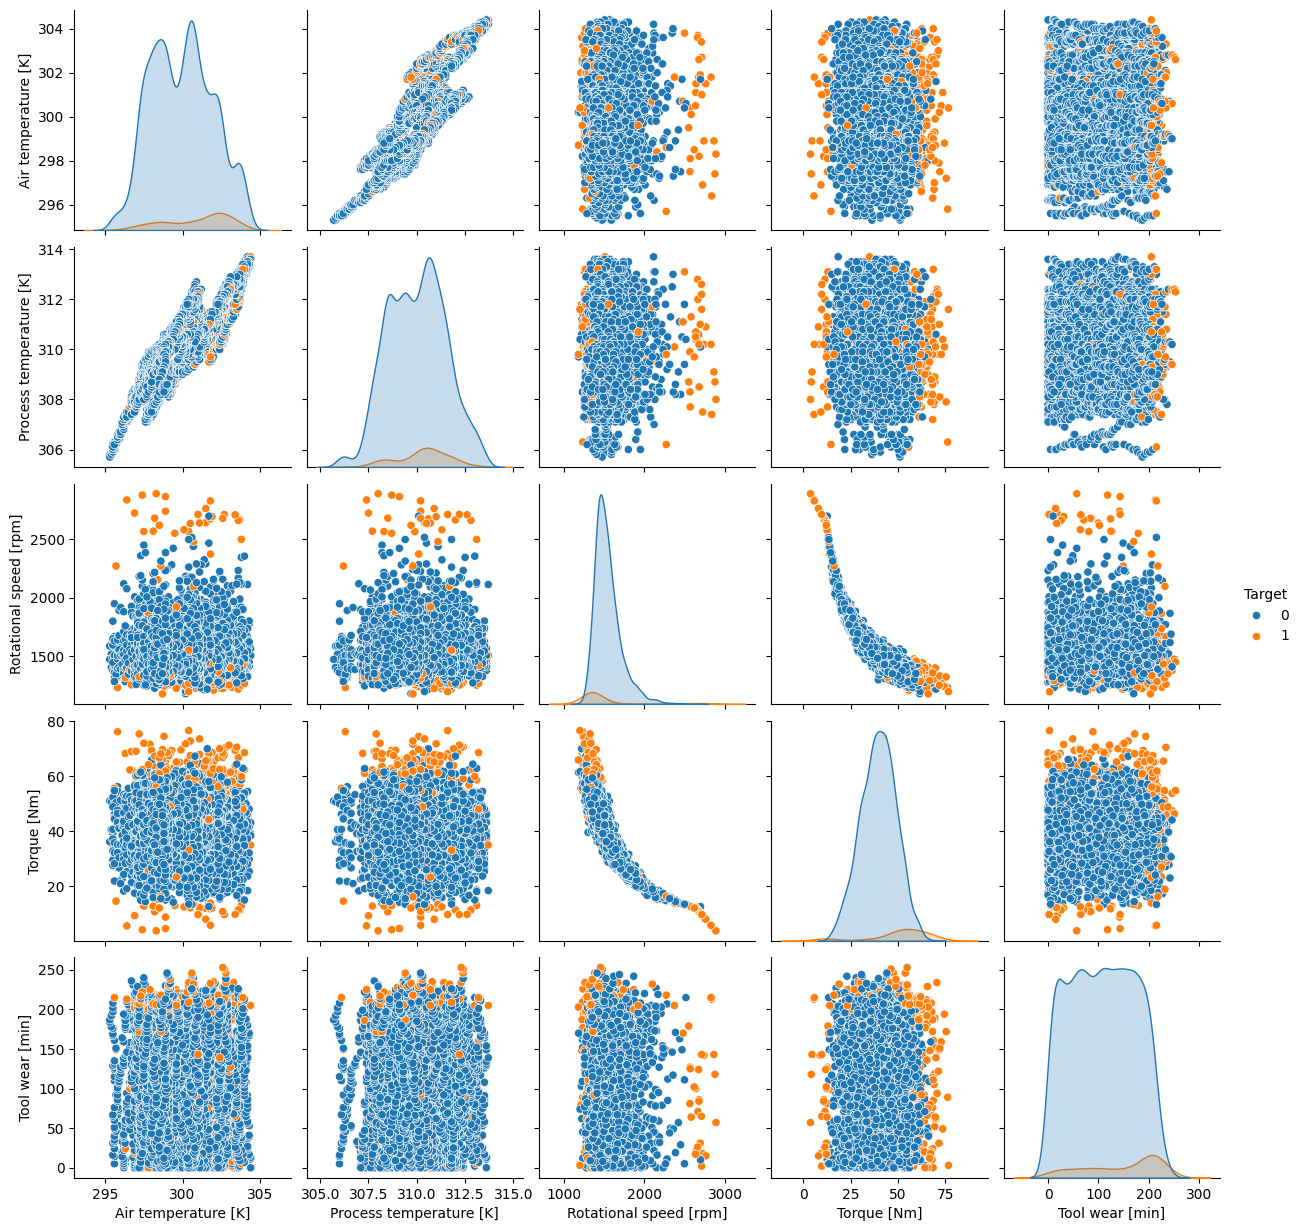

In [ ]:
a=['Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]','Torque [Nm]',	'Tool wear [min]']
l=data[a]
sns.pairplot(data,hue='Target',vars=l)
plt.show()

Above all pair plots are the relations between numerical columns with respect to target column.
1. Air temperature: Failures occurs at low temperatures
2. Process temperature: Failures occurs at low temperature
3. Machine works with no failure when the torque is in between 20 and 60. and when Rotational speed is between 1500 to 2000
4. Failure increases as tool wear increases


**Applying Machine Learning algorithms**


In [ ]:
# Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Type'] = le.fit_transform(data['Type'])
data['Failure Type'] = le.fit_transform(data['Failure Type'])
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1,1,298.2,308.7,1408,46.3,3,0,1
2,1,298.1,308.5,1498,49.4,5,0,1
4,1,298.2,308.7,1408,40.0,9,0,1
5,2,298.1,308.6,1425,41.9,11,0,1
6,1,298.1,308.6,1558,42.4,14,0,1


In [ ]:
data["Failure Type"].value_counts()

Failure Type
1    4650
0     112
3      95
2      78
4      45
Name: count, dtype: int64

In [ ]:
data.shape

(4980, 8)








***Logistic Regression***

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
X = data.drop(columns=["Target",'Failure Type'])
y = data["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_test = logreg.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
y_pred_train = logreg.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy on training set:", accuracy_train)
print("Accuracy on test set:", accuracy_test )
conf_matrix = confusion_matrix(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test)
print("Confusion Matrix:",conf_matrix)
print("Classification Report:", class_report)

Accuracy on training set: 0.947289156626506
Accuracy on test set: 0.9538152610441767
Confusion Matrix: [[922   7]
 [ 39  28]]
Classification Report:               precision    recall  f1-score   support

           0       0.96      0.99      0.98       929
           1       0.80      0.42      0.55        67

    accuracy                           0.95       996
   macro avg       0.88      0.71      0.76       996
weighted avg       0.95      0.95      0.95       996



***Decision Tree***

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
X = data.drop(columns=["Target","Failure Type"])
y = data["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
decision_tree = DecisionTreeClassifier(random_state=45)
decision_tree.fit(X_train, y_train)
y_pred_test = lcla.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
y_pred_train = logreg.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy on training set:", accuracy_train)
print("Accuracy on test set:", accuracy_test )
conf_matrix = confusion_matrix(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test)
print("Confusion Matrix:",conf_matrix)
print("Classification Report:", class_report)

Accuracy on training set: 0.9469305794606999
Accuracy on test set: 0.9511378848728246
Confusion Matrix: [[1383   10]
 [  63   38]]
Classification Report:               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1393
           1       0.79      0.38      0.51       101

    accuracy                           0.95      1494
   macro avg       0.87      0.68      0.74      1494
weighted avg       0.95      0.95      0.94      1494



***Random Forest***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
X = data.drop(columns=["Target","Failure Type"])
y = data["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
random_forest = DecisionTreeClassifier(random_state=45)
random_forest.fit(X_train, y_train)
y_pred_test = random_forest.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
y_pred_train = random_forest.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy on training set:", accuracy_train)
print("Accuracy on test set:", accuracy_test )
conf_matrix = confusion_matrix(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test)
print("Confusion Matrix:",conf_matrix)
print("Classification Report:", class_report)

Accuracy on training set: 1.0
Accuracy on test set: 0.9718875502008032
Confusion Matrix: [[920  12]
 [ 16  48]]
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.99      0.99       932
           1       0.80      0.75      0.77        64

    accuracy                           0.97       996
   macro avg       0.89      0.87      0.88       996
weighted avg       0.97      0.97      0.97       996



 **SVC**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
X = data.drop(columns=["Target","Failure Type"])
y = data["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
svm_model = SVC(kernel="linear",random_state=45)
svm_model.fit(X_train, y_train)
y_pred_test = svm_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
svm_model.fit(X_train, y_train)
y_pred_test = svm_model.predict(X_test)
accuracy_train = accuracy_score(y_test, y_pred_test)
print("Accuracy on training set:", accuracy_train)
print("Accuracy on test set:", accuracy_test )
conf_matrix = confusion_matrix(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test)
print("Confusion Matrix:",conf_matrix)
print("Classification Report:", class_report)

Accuracy on training set: 0.9518072289156626
Accuracy on test set: 0.9518072289156626
Confusion Matrix: [[929   2]
 [ 46  19]]
Classification Report:               precision    recall  f1-score   support

           0       0.95      1.00      0.97       931
           1       0.90      0.29      0.44        65

    accuracy                           0.95       996
   macro avg       0.93      0.65      0.71       996
weighted avg       0.95      0.95      0.94       996



**Cross validation for all models**

**Logistic Regression**

In [ ]:
log = LogisticRegression()
params = {
          'penalty': ['l1', 'l2'],
          'random_state': list(range(100, 1050, 50)),
          'max_iter': list(range(100, 1000, 100))}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(log, params, cv=5)
grid_search.fit(X_train, y_train)
y_pred_test = grid_search.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
y_pred_train = grid_search.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy on training set:", accuracy_train)
print("Accuracy on test set:", accuracy_test )
conf_matrix = confusion_matrix(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test)
print("Confusion Matrix:",conf_matrix)
print("Classification Report:", class_report)

Accuracy on training set: 0.9482931726907631
Accuracy on test set: 0.9528112449799196
Confusion Matrix: [[923   8]
 [ 39  26]]
Classification Report:               precision    recall  f1-score   support

           0       0.96      0.99      0.98       931
           1       0.76      0.40      0.53        65

    accuracy                           0.95       996
   macro avg       0.86      0.70      0.75       996
weighted avg       0.95      0.95      0.95       996



**ROC Curve for logistic Regression**

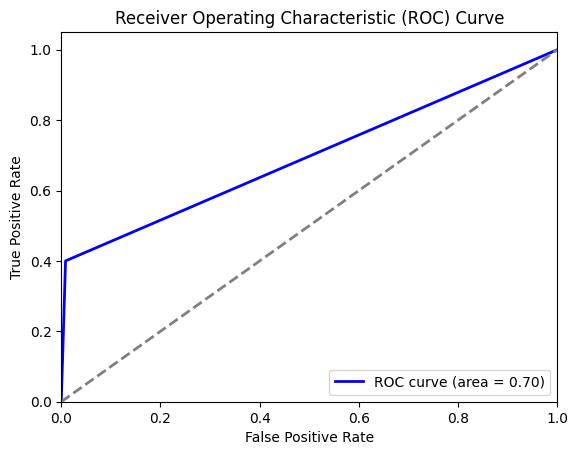

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, y_pred_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**Decision Tree Classifier**

In [ ]:
DT = DecisionTreeClassifier()
params = {'min_samples_leaf': list(range(3, 10)), 'min_samples_split': list(range(2, 10)), 'random_state': list(range(40, 200, 20))}

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(DT, params, cv=5)
grid_search.fit(X_train, y_train)
y_pred_test = grid_search.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
y_pred_train = grid_search.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy on training set:", accuracy_train)
print("Accuracy on test set:", accuracy_test )
conf_matrix = confusion_matrix(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test)
print("Confusion Matrix:",conf_matrix)
print("Classification Report:", class_report)

Accuracy on training set: 0.9806726907630522
Accuracy on test set: 0.9698795180722891
Confusion Matrix: [[923   8]
 [ 22  43]]
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.99      0.98       931
           1       0.84      0.66      0.74        65

    accuracy                           0.97       996
   macro avg       0.91      0.83      0.86       996
weighted avg       0.97      0.97      0.97       996



**ROC Curve for Decision Tree**

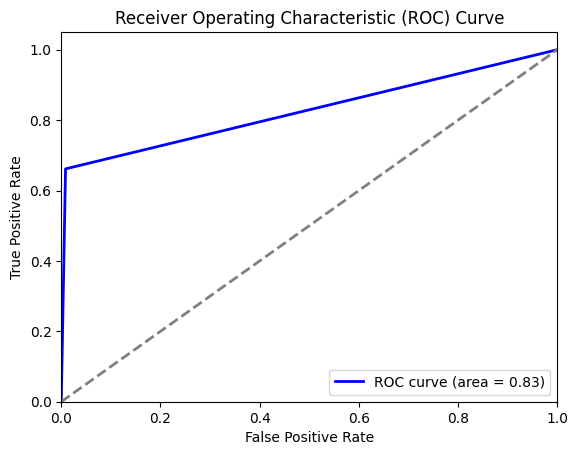

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, y_pred_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**Random Forest**

In [ ]:
RF = RandomForestClassifier(random_state=42)
params = {'min_samples_leaf': list(range(3, 10)), 'min_samples_split': list(range(2, 10))}
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(RF, params, cv=5)
grid_search.fit(X_train, y_train)
y_pred_test = grid_search.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
y_pred_train = grid_search.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy on training set:", accuracy_train)
print("Accuracy on test set:", accuracy_test )
conf_matrix = confusion_matrix(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test)
print("Confusion Matrix:",conf_matrix)
print("Classification Report:", class_report)

Accuracy on training set: 0.9882028112449799
Accuracy on test set: 0.9769076305220884
Confusion Matrix: [[923   8]
 [ 15  50]]
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.99      0.99       931
           1       0.86      0.77      0.81        65

    accuracy                           0.98       996
   macro avg       0.92      0.88      0.90       996
weighted avg       0.98      0.98      0.98       996



**ROC Curve for Random Forest**

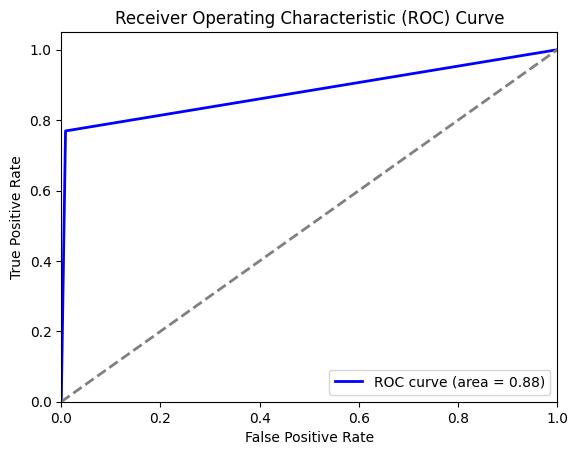

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, y_pred_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**SVM**

In [ ]:
svm = SVC()
params = {
          'kernel': ['linear', 'rbf'],
          'random_state': list(range(100, 1050, 50))}

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(svm, params, cv=5)
grid_search.fit(X_train, y_train)
y_pred_test = grid_search.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
y_pred_train = grid_search.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy on training set:", accuracy_train)
print("Accuracy on test set:", accuracy_test )
conf_matrix = confusion_matrix(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test)
print("Confusion Matrix:",conf_matrix)
print("Classification Report:", class_report)

Accuracy on training set: 0.963855421686747
Accuracy on test set: 0.963855421686747
Confusion Matrix: [[924   7]
 [ 29  36]]
Classification Report:               precision    recall  f1-score   support

           0       0.97      0.99      0.98       931
           1       0.84      0.55      0.67        65

    accuracy                           0.96       996
   macro avg       0.90      0.77      0.82       996
weighted avg       0.96      0.96      0.96       996



**ROC Curve for SVM**

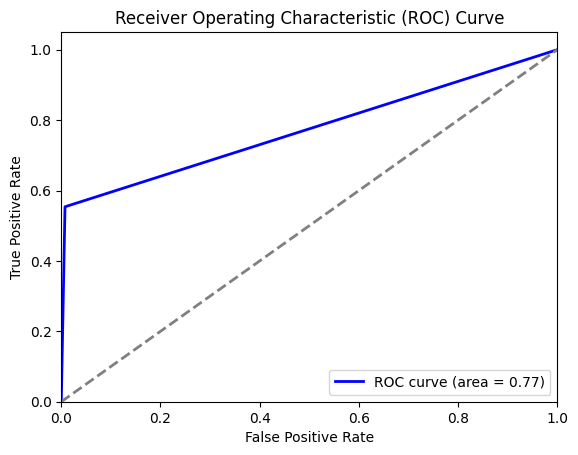

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, y_pred_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
train_acc=[0.947289156626506,0.9809236947791165,0.9871987951807228,0.9871987951807228]
test_acc=[0.9477911646586346,0.963855421686747,0.9678714859437751,0.9618473895582329]
models=['Logistic Regression','Decision Tree','Random Forest','SVM']
h=pd.DataFrame(list(zip(models,train_acc,test_acc)),columns=['Model','Train Accuracy','Test Accuracy'])
h

,Model,Train Accuracy,Test Accuracy
0,Logistic Regression,0.947289,0.947791
1,Decision Tree,0.980924,0.963855
2,Random Forest,0.987199,0.967871
3,SVM,0.987199,0.961847


Visualising the test accuracies of all used models

[Text(0, 0, '0.947791'),
 Text(0, 0, '0.963855'),
 Text(0, 0, '0.967871'),
 Text(0, 0, '0.961847')]

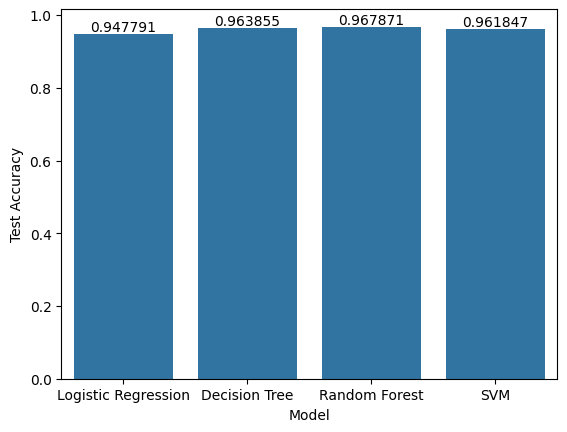

In [ ]:
a=sns.barplot(x='Model',y='Test Accuracy',data=h)
a.bar_label(a.containers[0])

From above plot we conclude that Logistic regression model is more preferable   among all models.

**Conclusions**


1. Predictive Capability: The model developed from the dataset effectively predicts equipment failures, allowing for proactive maintenance.
2. Key Features: Features such as air temperature, process temperature, rotational speed, torque, and tool wear are significant in forecasting failures.
3. Performance: The model's performance, as measured by ROC-AUC and other metrics, indicates a strong ability to distinguish between failure and non-failure instances.

